# 1.5.9 Feature Matching

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [22]:
img1 = cv2.imread('soccer1.png',0) # queryImage
img2 = cv2.imread('soccer4.png',0) # trainImage

In [23]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

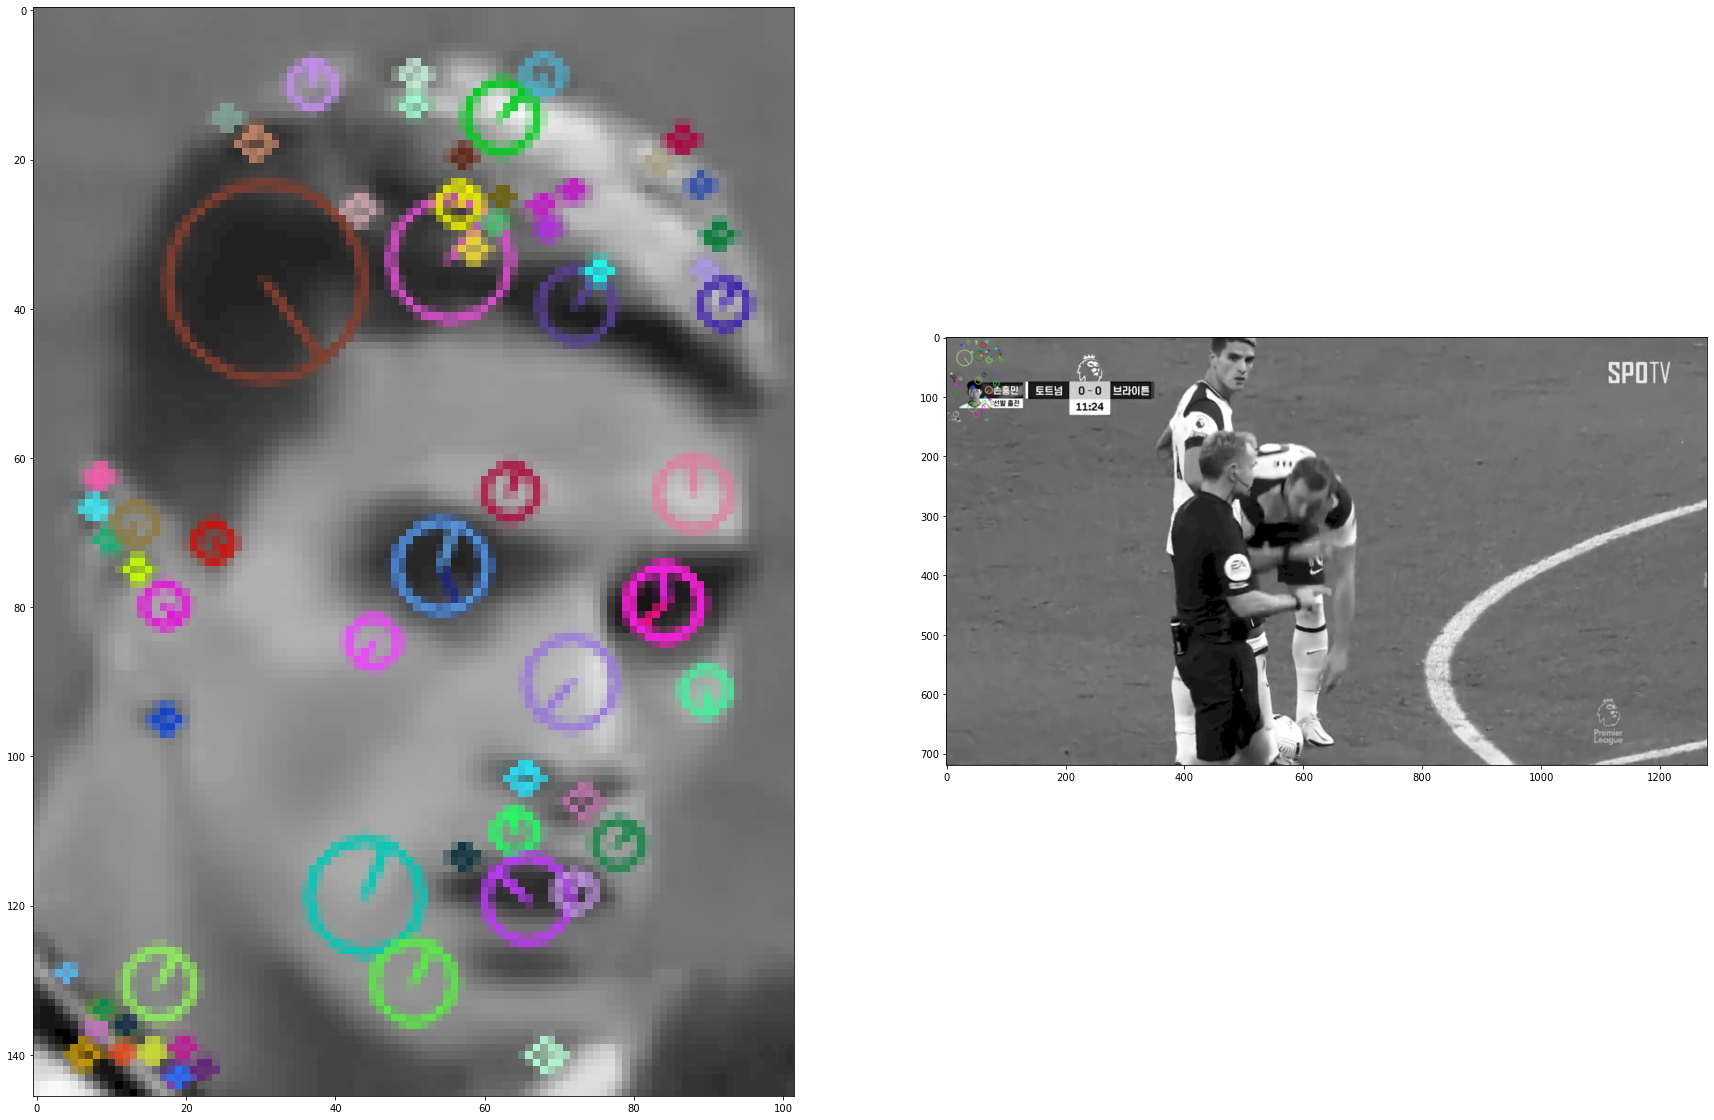

In [24]:
img1v=cv2.drawKeypoints(img1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2v=cv2.drawKeypoints(img2,kp1,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(30,26))
plt.subplot(1,2,1),plt.imshow(img1v)
plt.subplot(1,2,2),plt.imshow(img2v)
plt.show()


In [25]:
cv2.imwrite('out.png',img1v)

True

In [26]:
# create BFMatcher object
bf = cv2.BFMatcher()
# Match descriptors.
matches = bf.knnMatch(des1,des2,k=2)
good =[]

In [27]:
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

In [28]:
len(good)

20

In [29]:
img3=cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

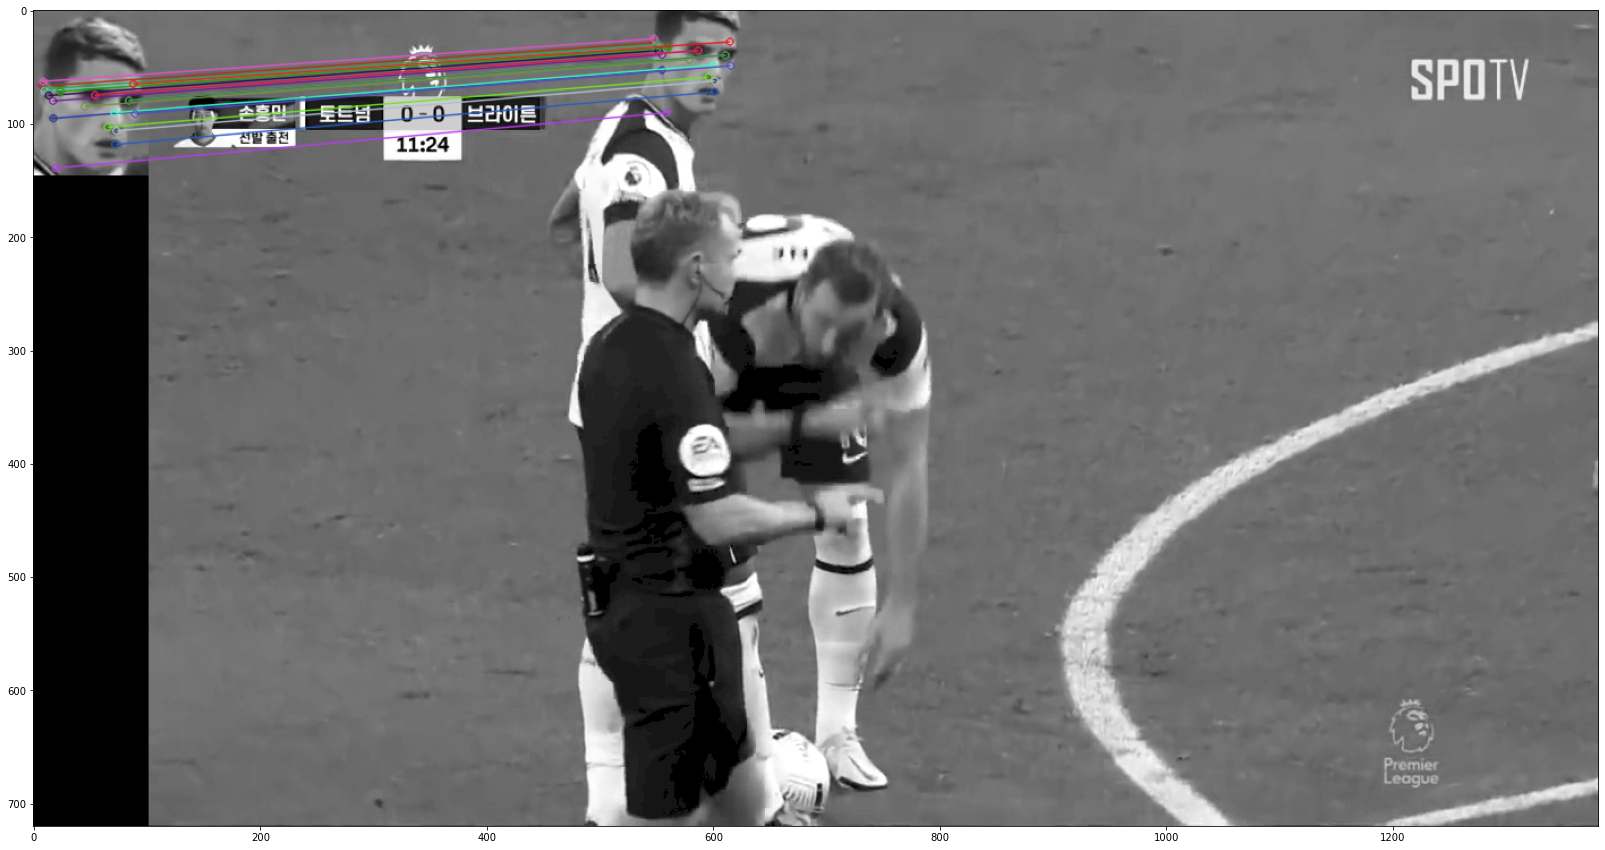

(<matplotlib.image.AxesImage at 0x22b2516a0a0>, None)

In [30]:
plt.figure(figsize=(30,15))
plt.imshow(img3),plt.show()

TypeError: __init__() got an unexpected keyword argument 'figzise'

In [ ]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], flags=2)
plt.imshow(img3),plt.show()